## Reading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import re

In [2]:
def clean(df, topk=False):
    df = df[df['State'] == 'finished']

    if topk:
        patterns = ['effective_l0$', 'frac_recovered$', 'mse_loss$', 'loss_original$', 'loss_reconstructed$']
    else:
        patterns = ['l0$', 'frac_recovered$', 'mse_loss$', 'loss_original$', 'loss_reconstructed$']
    filtered_columns = df.columns[df.columns.str.contains('|'.join(patterns))]
    df = df[filtered_columns]
    df.columns = [col.split('/')[-1] for col in df.columns]
    
    if topk:
        l0 = df["effective_l0"].to_numpy().flatten()
    else:
        l0 = df["l0"].to_numpy().flatten()
    mse_loss = df["mse_loss"].to_numpy().flatten()
    frac_recovered = df["frac_recovered"].to_numpy().flatten()
    loss_original = df["loss_original"].to_numpy().flatten()
    loss_reconstructed = df["loss_reconstructed"].to_numpy().flatten()
    delta_ce = loss_reconstructed - loss_original

    data = np.array([l0, mse_loss, frac_recovered, delta_ce]).T
    df = pd.DataFrame(data, columns=['l0', 'mse_loss', 'frac_recovered', 'delta_ce'])
    df = df.sort_values(by='l0')
    return df

In [3]:
def clean_switch(df):
    df = df[df['State'] == 'finished']

    patterns = ['experts$', 'heaviside$', 'effective_l0$', 'mse_loss$', 'frac_recovered$', 'loss_original$', 'loss_reconstructed$', 'frac_recovered$']
    filtered_columns = df.columns[df.columns.str.contains('|'.join(patterns))]
    df = df[filtered_columns]
    df.columns = [re.split(r'[./]', col)[-1] for col in df.columns]
    
    l0 = df["effective_l0"].to_numpy().flatten()
    mse_loss = df["mse_loss"].to_numpy().flatten()
    experts = df["experts"].to_numpy().flatten()
    heaviside = df["heaviside"].to_numpy().flatten()
    loss_original = df["loss_original"].to_numpy().flatten()
    loss_reconstructed = df["loss_reconstructed"].to_numpy().flatten()
    frac_recovered = df["frac_recovered"].to_numpy().flatten()
    delta_ce = loss_reconstructed - loss_original

    data = np.array([experts, heaviside, l0, mse_loss, frac_recovered, delta_ce]).T
    df = pd.DataFrame(data, columns=['experts', 'heaviside', 'l0', 'mse_loss', 'frac_recovered', 'delta_ce'])
    df = df.sort_values(by='l0')
    return df

In [4]:
df_switch_base = pd.read_csv("primary-switch-fast.csv")
df_switch_base = clean_switch(df_switch_base)

In [5]:
df_switch = pd.read_csv("switch-heavy.csv")
df_switch = clean_switch(df_switch)

In [6]:
df_switch

,experts,heaviside,l0,mse_loss,frac_recovered,delta_ce
0,32.0,True,8.0,2947.328369,0.943163,0.797658
22,32.0,False,8.0,2590.572754,0.951566,0.679734
6,32.0,True,16.0,2286.98291,0.96717,0.460741
23,32.0,False,16.0,1851.95752,0.976876,0.331371
4,32.0,True,32.0,1883.77417,0.979433,0.288635
20,32.0,False,32.0,1360.90332,0.987024,0.182102
2,32.0,True,48.0,1676.118774,0.984302,0.220312
21,32.0,False,48.0,1186.752441,0.990559,0.135286
14,32.0,True,64.0,1532.339355,0.987563,0.174544
18,32.0,False,64.0,1069.776123,0.992008,0.11216


In [7]:
df_switch_base

,experts,heaviside,l0,mse_loss,frac_recovered,delta_ce
36,32.0,False,8.0,2244.557373,0.961925,0.534355
52,16.0,False,8.0,2254.317139,0.962151,0.531175
4,128.0,False,8.0,2295.83374,0.957695,0.593711
20,64.0,False,8.0,2262.835938,0.960305,0.557089
21,64.0,False,16.0,1793.988525,0.977019,0.329318
37,32.0,False,16.0,1715.283203,0.978808,0.303676
53,16.0,False,16.0,1674.737305,0.980826,0.274767
5,128.0,False,16.0,1906.494385,0.972619,0.392373
48,16.0,False,32.0,1296.666138,0.988825,0.156826
6,128.0,False,32.0,1593.911621,0.980889,0.275089


In [10]:
df_switch16 = df_switch_base[df_switch_base['experts'] == 16]

In [18]:
df_1on_heavy = df_switch[(df_switch['experts'] == 32) & (df_switch['heaviside'] == True)]
df_1on = df_switch[(df_switch['experts'] == 32) & (df_switch['heaviside'] == False)]

## Plotting

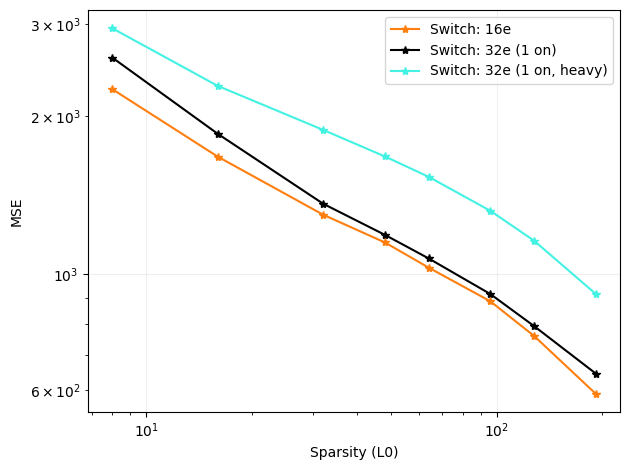

In [19]:
plt.plot(df_switch16['l0'], df_switch16['mse_loss'], label='Switch: 16e', marker='*', color='#ff7f0e')
plt.plot(df_1on['l0'], df_1on['mse_loss'], label='Switch: 32e (1 on)', marker='*', color='#000000')
plt.plot(df_1on_heavy['l0'], df_1on_heavy['mse_loss'], label='Switch: 32e (1 on, heavy)', marker='*', color='#43f2e3')

plt.xscale('log')
plt.yscale('log')

plt.xlabel("Sparsity (L0)")
plt.ylabel("MSE")

plt.legend()

plt.grid(True, which="major", ls="-", alpha=0.2)


plt.tight_layout()
plt.savefig("l0_mse.png")
plt.show()

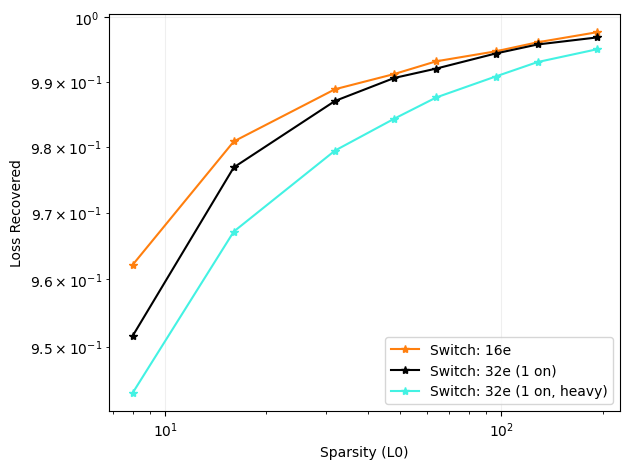

In [22]:
plt.plot(df_switch16['l0'], df_switch16['frac_recovered'], label='Switch: 16e', marker='*', color='#ff7f0e')
plt.plot(df_1on['l0'], df_1on['frac_recovered'], label='Switch: 32e (1 on)', marker='*', color='#000000')
plt.plot(df_1on_heavy['l0'], df_1on_heavy['frac_recovered'], label='Switch: 32e (1 on, heavy)', marker='*', color='#43f2e3')

plt.xscale('log')
plt.yscale('log')

plt.xlabel("Sparsity (L0)")
plt.ylabel("Loss Recovered")

plt.legend()

plt.grid(True, which="major", ls="-", alpha=0.2)


plt.tight_layout()
plt.savefig("l0_recovered.png")
plt.show()

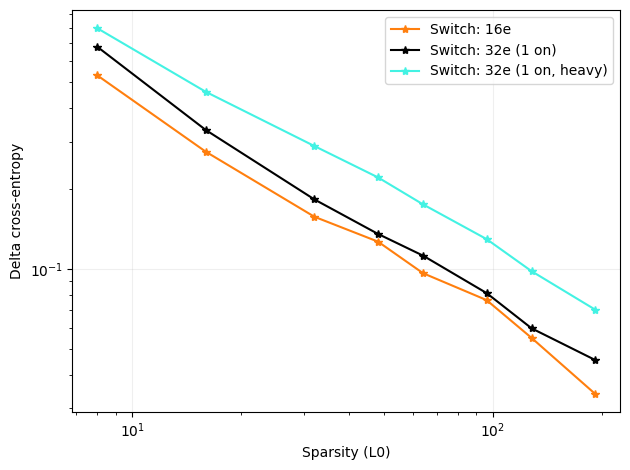

In [23]:
plt.plot(df_switch16['l0'], df_switch16['delta_ce'], label='Switch: 16e', marker='*', color='#ff7f0e')
plt.plot(df_1on['l0'], df_1on['delta_ce'], label='Switch: 32e (1 on)', marker='*', color='#000000')
plt.plot(df_1on_heavy['l0'], df_1on_heavy['delta_ce'], label='Switch: 32e (1 on, heavy)', marker='*', color='#43f2e3')


plt.xscale('log')
plt.yscale('log')

plt.xlabel("Sparsity (L0)")
plt.ylabel("Delta cross-entropy")

plt.legend()

plt.grid(True, which="major", ls="-", alpha=0.2)


plt.tight_layout()
plt.savefig("l0_deltace.png")
plt.show()